In [1]:
%matplotlib inline

In [2]:
# it is good idea to have a directory of data defined so you can work between small size sample and then entire data

#path="data/dogscats/"
path="data/dogscats/sample/"

In [3]:
from __future__ import division,print_function

import os, json
from glob import glob
import numpy as np
np.set_printoptions(precision=4, linewidth=100)
from matplotlib import pyplot as plt

In [4]:
import utils; reload(utils)
from utils import plots

Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5103)
/home/ubuntu/anaconda2/lib/python2.7/site-packages/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)
Using Theano backend.


In [5]:
batch_size=64

In [6]:
from vgg16 import Vgg16
# state of the art model from the ImageNet2014


In [7]:
vgg=Vgg16()
batches=vgg.get_batches(path+'train',batch_size=4)

Found 16 images belonging to 2 classes.


In [8]:
# plot 
imgs,labels=next(batches)


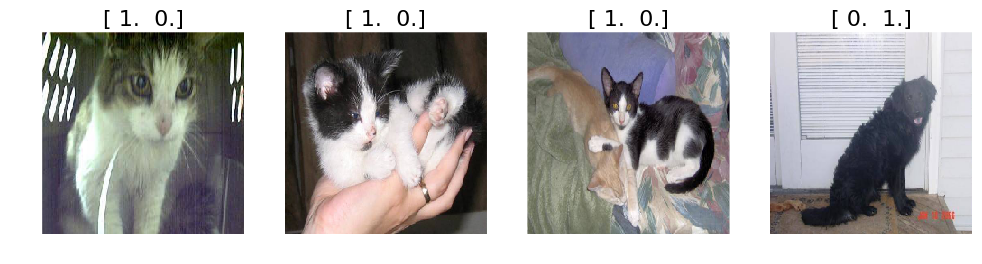

In [9]:
plots(imgs,titles=labels)
# notice one hot en coding here


In [10]:
batches=vgg.get_batches(path+'train',batch_size=4)
imgs,labels=next(batches)

Found 16 images belonging to 2 classes.


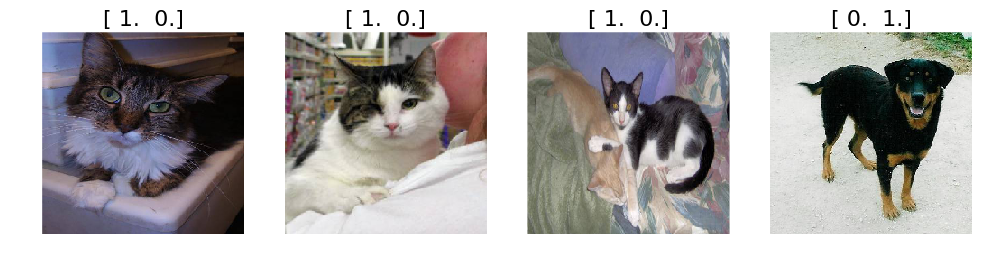

In [11]:
plots(imgs,titles=labels)
# notice one hot en coding here

In [12]:
# model with no fine tuning 
# will predict actual class of the model by using data from the ImageNet labels here lables

vgg.predict(imgs,True)


(array([ 0.5333,  0.1022,  0.2421,  0.8193], dtype=float32),
 array([281, 728, 158, 234]),
 [u'tabby', u'plastic_bag', u'toy_terrier', u'Rottweiler'])

0.1022 here it shows that for 2nd image it predicted u'plastic_bag ? why this result came?
As we used pretraned moded without any fine tuening so it predicted out of 1000 classes of imagenet lables

    

## Now with fine tuning: How to predict just two classes? Dogs Or Cats?

User pretrained model and use finetuning, keras treats each dir as one class lable, so training should have each class label wise directories


In [13]:
batch_size=64
batches=vgg.get_batches(path+'train',batch_size=batch_size)
val_batches = vgg.get_batches(path+'valid', batch_size=batch_size)

Found 16 images belonging to 2 classes.
Found 8 images belonging to 2 classes.


In [14]:
# fine Tune
vgg.finetune(batches)

In [15]:
# Now Fit 
vgg.fit(batches,val_batches,nb_epoch=1)

Epoch 1/1
16/16 [==============================] - 0s - loss: 1.4215 - acc: 0.5625 - val_loss: 0.5650 - val_acc: 0.6250


In [17]:
vgg.predict(imgs,True)

(array([ 0.9359,  0.7056,  0.8814,  0.5369], dtype=float32),
 array([0, 0, 0, 0]),
 ['cats', 'cats', 'cats', 'cats'])